In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.datasets.cifar10 import load_data

 #load data CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = load_data()

# rescale image
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0


170498071/170498071 [==============================] - 19s 0us/step


In [2]:
#define model
model = Sequential([
    Conv2D(32, (3,3), input_shape=(32, 32, 3), padding="same", activation="relu", kernel_constraint=MaxNorm(3)),
    Dropout(0.3),
    Conv2D(32, (3,3), padding="same", activation="relu", kernel_constraint=MaxNorm(3)),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation="relu", kernel_constraint=MaxNorm(3)),
    Dropout(0.5),
    Dense(10, activation="sigmoid")
])

# summarize model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                        

In [3]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",
              metrics="sparse_categorical_accuracy")

model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=2, batch_size=32, workers=12)

# com 20 epocas testado no google colab a acuracia chegou a 0.7432

Epoch 1/2
1563/1563 [==============================] - 228s 143ms/step - loss: 1.5292 - sparse_categorical_accuracy: 0.4472 - val_loss: 1.2027 - val_sparse_categorical_accuracy: 0.5768
Epoch 2/2
1563/1563 [==============================] - 194s 124ms/step - loss: 1.2178 - sparse_categorical_accuracy: 0.5683 - val_loss: 1.0933 - val_sparse_categorical_accuracy: 0.6173


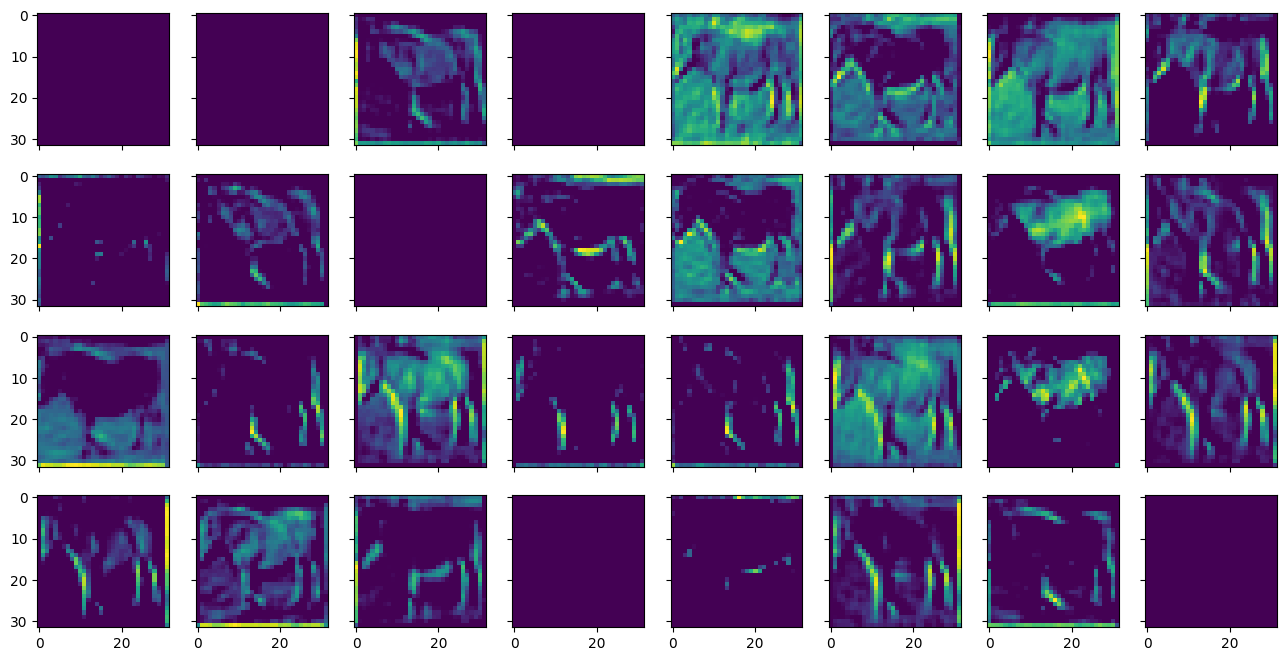

In [4]:
extractor = tf.keras.Model(inputs=model.inputs,
                           outputs=[layer.output for layer in model.layers])
features = extractor(np.expand_dims(X_train[7], 0))

# Show the 32 feature maps from the first layer
l0_features = features[0].numpy()[0]

fig, ax = plt.subplots(4, 8, sharex=True, sharey=True, figsize=(16,8))
for i in range(0, 32):
    row, col = i//8, i%8
    ax[row][col].imshow(l0_features[..., i])

plt.show()

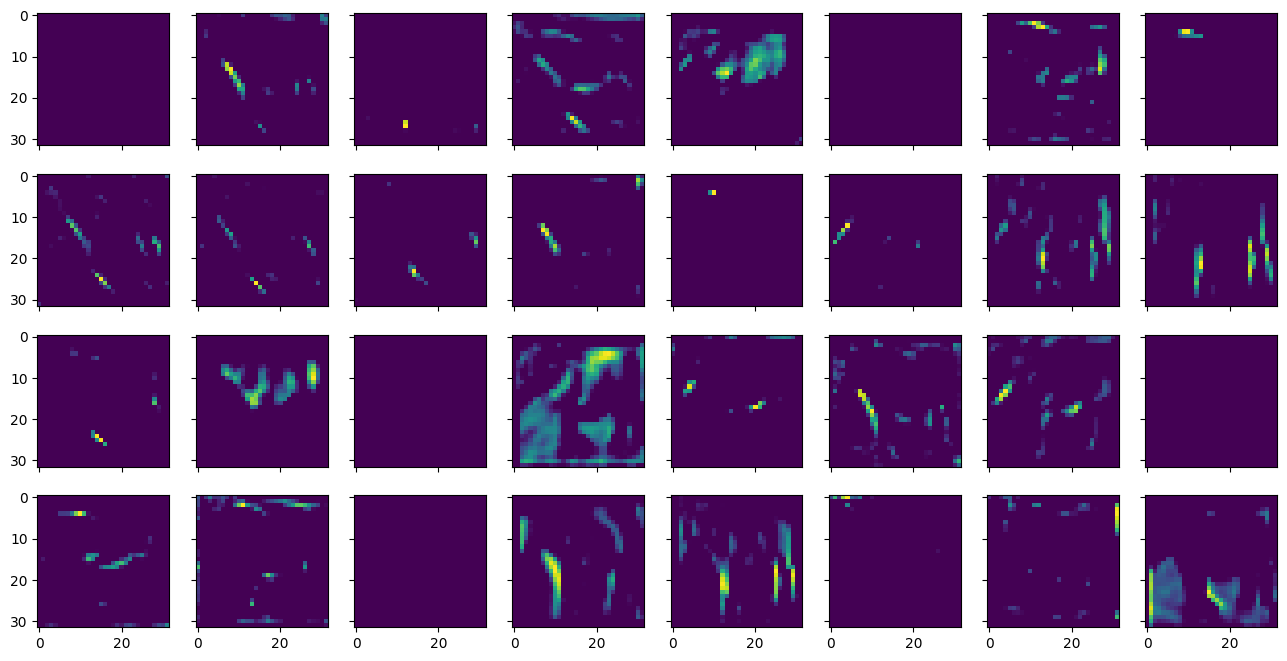

In [5]:

# Show the 32 feature maps from the third layer
l2_features = features[2].numpy()[0]

fig, ax = plt.subplots(4, 8, sharex=True, sharey=True, figsize=(16,8))
for i in range(0, 32):
    row, col = i//8, i%8
    ax[row][col].imshow(l2_features[..., i])

plt.show()